Dans ce notebook :
- calcul des matrices de connectivité
- sélection de paramètres Ridge (vecteur de features des sommets du graphe)
- calcul du graphe (poids des arêtes)
- affichage de la matrice d'adjacence du graphe


In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from nilearn import datasets, connectome
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import FunctionTransformer
import scipy.io as sio

# Load ABIDE data
abide_data = datasets.fetch_abide_pcp(pipeline='cpac', derivatives='rois_ho')
phenotype_data = abide_data.phenotypic

# Subject list
subject_IDs = [subject['SUB_ID'] for subject in phenotype_data]


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/ABIDE_pcp



 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


In [18]:
# Extraction of phenotypic information
def get_subject_score(subject_list, score):
    scores_dict = {}
    for row in phenotype_data:
        if row['SUB_ID'] in subject_list:
            scores_dict[row['SUB_ID']] = row[score]
    return scores_dict

# Distance matrix (correlation) between pairs of dataset
def calculate_distance(x_data):
    distv = distance.pdist(x_data, metric='correlation')
    dist = distance.squareform(distv)
    return dist

# Calcul of the affinity matrix based on distance
def calculate_affinity_graph(dist):
    sigma = np.mean(dist)
    sparse_graph = np.exp(- dist ** 2 / (2 * sigma ** 2))
    return sparse_graph

# Function to create the final graph
def create_final_graph(graph_feat, sparse_graph):
    final_graph = graph_feat * sparse_graph
    return final_graph

# Create affinity graph based on phenotypic scores
def create_affinity_graph_from_scores(scores, subject_list):
    num_nodes = len(subject_list)
    graph = np.zeros((num_nodes, num_nodes))

    for l in scores:
        label_dict = get_subject_score(subject_list, l)

        # for quantitative phenotypic scores (as SEX or SITE_ID)
        if l in ['SEX', 'SITE_ID']:
            for k in range(num_nodes):
                for j in range(k + 1, num_nodes):
                    if label_dict[subject_list[k]] == label_dict[subject_list[j]]:
                        graph[k, j] += 1
                        graph[j, k] += 1

    return graph

In [22]:
# Calcul of connectivity for a subject
def subject_connectivity(timeseries, subject, atlas_name, kind, save=False, save_path=None):
    """
    Calcule connectivity metrix for one subject

    timeseries   : time series for the subject (time x region)
    subject      : subject ID
    atlas_name   : atlas used (e.g. 'ho')
    kind         : kind of connectivity ('correlation', 'partial correlation', etc.)
    save         : if True, save the connectivity matrix in a fine
    save_path    : path if 'save' is True

    returns:
    connectivity : connectivity matrix (region x region)
    """
    print(f"Calcul of the {kind} matrix for subject {subject}")

    # Connectivity calcul from time series
    if kind in ['correlation', 'partial correlation', 'tangent']:
        conn_measure = connectome.ConnectivityMeasure(kind=kind)
        connectivity = conn_measure.fit_transform([timeseries])[0]
    else:
        raise ValueError(f"Type de connectivité non supporté : {kind}")

    # Save the matrix
    if save:
        if save_path is None:
            print("no path")
        subject_file = f"{save_path}/{subject}_{atlas_name}_{kind.replace(' ', '_')}.mat"
        sio.savemat(subject_file, {'connectivity': connectivity})

    return connectivity

# Function to get connictivity networks
def get_networks(subject_list, kind, atlas_name="ho"):
    """
    subject_list : list of subject IDs
    kind         : kind of connectivity ('correlation', 'partial correlation', 'tangent')
    atlas_name   : name of atlas uned (e.g. 'ho' or 'aal')

    return:
    matrix       : matrix caracteristic of connectivity networks (subject x caracteristics)
    """
    all_networks = []

    # Get time series for each subject
    timeseries = abide_data.rois_ho  # contain the time series for each subject (timepoints x regions)

    for i, subject in enumerate(subject_list):
        # Connectivity matrix for each subject
        connectivity_matrix = subject_connectivity(timeseries[i], subject, atlas_name, kind, save=False)

        if connectivity_matrix.shape[0] != connectivity_matrix.shape[1]:
            raise ValueError(f"Connectivity matrix for subject {subject} is not square !")

        # Fisher transformation (arctanh) to normalize correlations
        norm_matrix = np.arctanh(connectivity_matrix)

        # Extraction of upper part (above diagonal)
        idx = np.triu_indices_from(connectivity_matrix, 1)
        vectorized_matrix = norm_matrix[idx]

        all_networks.append(vectorized_matrix)

    # Stack vectors to create the caracteristics matrix
    feature_matrix = np.vstack(all_networks)

    return feature_matrix

# Exemple d'utilisation
subject_list = subject_IDs  # Liste des IDs des sujets
features = get_networks(subject_list, kind='correlation', atlas_name="ho")


Calcul of the correlation matrix for subject 50003
Calcul of the correlation matrix for subject 50004
Calcul of the correlation matrix for subject 50005
Calcul of the correlation matrix for subject 50006
Calcul of the correlation matrix for subject 50007
Calcul of the correlation matrix for subject 50008
Calcul of the correlation matrix for subject 50010
Calcul of the correlation matrix for subject 50011
Calcul of the correlation matrix for subject 50012
Calcul of the correlation matrix for subject 50013
Calcul of the correlation matrix for subject 50014
Calcul of the correlation matrix for subject 50015
Calcul of the correlation matrix for subject 50016
Calcul of the correlation matrix for subject 50020


<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50022
Calcul of the correlation matrix for subject 50023
Calcul of the correlation matrix for subject 50024
Calcul of the correlation matrix for subject 50025
Calcul of the correlation matrix for subject 50026
Calcul of the correlation matrix for subject 50027
Calcul of the correlation matrix for subject 50028
Calcul of the correlation matrix for subject 50030
Calcul of the correlation matrix for subject 50031
Calcul of the correlation matrix for subject 50032
Calcul of the correlation matrix for subject 50033
Calcul of the correlation matrix for subject 50034
Calcul of the correlation matrix for subject 50035
Calcul of the correlation matrix for subject 50036
Calcul of the correlation matrix for subject 50037
Calcul of the correlation matrix for subject 50038
Calcul of the correlation matrix for subject 50039
Calcul of the correlation matrix for subject 50040
Calcul of the correlation matrix for subject 50041
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50103
Calcul of the correlation matrix for subject 50104
Calcul of the correlation matrix for subject 50105
Calcul of the correlation matrix for subject 50106
Calcul of the correlation matrix for subject 50107
Calcul of the correlation matrix for subject 50109
Calcul of the correlation matrix for subject 50111
Calcul of the correlation matrix for subject 50112
Calcul of the correlation matrix for subject 50113
Calcul of the correlation matrix for subject 50114
Calcul of the correlation matrix for subject 50115
Calcul of the correlation matrix for subject 50116
Calcul of the correlation matrix for subject 50117
Calcul of the correlation matrix for subject 50118
Calcul of the correlation matrix for subject 50119
Calcul of the correlation matrix for subject 50121
Calcul of the correlation matrix for subject 50123
Calcul of the correlation matrix for subject 50124
Calcul of the correlation matrix for subject 50125
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50161
Calcul of the correlation matrix for subject 50162
Calcul of the correlation matrix for subject 50163
Calcul of the correlation matrix for subject 50164
Calcul of the correlation matrix for subject 50167
Calcul of the correlation matrix for subject 50168
Calcul of the correlation matrix for subject 50169
Calcul of the correlation matrix for subject 50170
Calcul of the correlation matrix for subject 50171
Calcul of the correlation matrix for subject 50182
Calcul of the correlation matrix for subject 50183
Calcul of the correlation matrix for subject 50184
Calcul of the correlation matrix for subject 50186
Calcul of the correlation matrix for subject 50187
Calcul of the correlation matrix for subject 50188
Calcul of the correlation matrix for subject 50189
Calcul of the correlation matrix for subject 50190
Calcul of the correlation matrix for subject 50193
Calcul of the correlation matrix for subject 50194
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50247
Calcul of the correlation matrix for subject 50248
Calcul of the correlation matrix for subject 50249
Calcul of the correlation matrix for subject 50250
Calcul of the correlation matrix for subject 50251
Calcul of the correlation matrix for subject 50252
Calcul of the correlation matrix for subject 50253
Calcul of the correlation matrix for subject 50254
Calcul of the correlation matrix for subject 50255
Calcul of the correlation matrix for subject 50257
Calcul of the correlation matrix for subject 50259
Calcul of the correlation matrix for subject 50260
Calcul of the correlation matrix for subject 50261
Calcul of the correlation matrix for subject 50262
Calcul of the correlation matrix for subject 50263
Calcul of the correlation matrix for subject 50264
Calcul of the correlation matrix for subject 50265
Calcul of the correlation matrix for subject 50266
Calcul of the correlation matrix for subject 50267
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50298
Calcul of the correlation matrix for subject 50300
Calcul of the correlation matrix for subject 50301
Calcul of the correlation matrix for subject 50302
Calcul of the correlation matrix for subject 50304
Calcul of the correlation matrix for subject 50308
Calcul of the correlation matrix for subject 50310
Calcul of the correlation matrix for subject 50312
Calcul of the correlation matrix for subject 50314
Calcul of the correlation matrix for subject 50315
Calcul of the correlation matrix for subject 50318
Calcul of the correlation matrix for subject 50319
Calcul of the correlation matrix for subject 50320
Calcul of the correlation matrix for subject 50321
Calcul of the correlation matrix for subject 50324
Calcul of the correlation matrix for subject 50325
Calcul of the correlation matrix for subject 50327
Calcul of the correlation matrix for subject 50329
Calcul of the correlation matrix for subject 50330
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50351
Calcul of the correlation matrix for subject 50352
Calcul of the correlation matrix for subject 50353
Calcul of the correlation matrix for subject 50354
Calcul of the correlation matrix for subject 50355
Calcul of the correlation matrix for subject 50356
Calcul of the correlation matrix for subject 50357
Calcul of the correlation matrix for subject 50358
Calcul of the correlation matrix for subject 50359
Calcul of the correlation matrix for subject 50360
Calcul of the correlation matrix for subject 50361
Calcul of the correlation matrix for subject 50362
Calcul of the correlation matrix for subject 50363
Calcul of the correlation matrix for subject 50364
Calcul of the correlation matrix for subject 50365
Calcul of the correlation matrix for subject 50366
Calcul of the correlation matrix for subject 50367
Calcul of the correlation matrix for subject 50368
Calcul of the correlation matrix for subject 50369
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57


Calcul of the correlation matrix for subject 50404
Calcul of the correlation matrix for subject 50405
Calcul of the correlation matrix for subject 50406
Calcul of the correlation matrix for subject 50407
Calcul of the correlation matrix for subject 50408
Calcul of the correlation matrix for subject 50410
Calcul of the correlation matrix for subject 50411
Calcul of the correlation matrix for subject 50412
Calcul of the correlation matrix for subject 50413
Calcul of the correlation matrix for subject 50414
Calcul of the correlation matrix for subject 50415
Calcul of the correlation matrix for subject 50416
Calcul of the correlation matrix for subject 50417
Calcul of the correlation matrix for subject 50418
Calcul of the correlation matrix for subject 50419
Calcul of the correlation matrix for subject 50421
Calcul of the correlation matrix for subject 50422
Calcul of the correlation matrix for subject 50424
Calcul of the correlation matrix for subject 50425
Calcul of the correlation matr

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50463
Calcul of the correlation matrix for subject 50466
Calcul of the correlation matrix for subject 50467
Calcul of the correlation matrix for subject 50468
Calcul of the correlation matrix for subject 50469
Calcul of the correlation matrix for subject 50470
Calcul of the correlation matrix for subject 50477
Calcul of the correlation matrix for subject 50480
Calcul of the correlation matrix for subject 50481
Calcul of the correlation matrix for subject 50482
Calcul of the correlation matrix for subject 50483
Calcul of the correlation matrix for subject 50485
Calcul of the correlation matrix for subject 50486
Calcul of the correlation matrix for subject 50487
Calcul of the correlation matrix for subject 50488
Calcul of the correlation matrix for subject 50490
Calcul of the correlation matrix for subject 50491
Calcul of the correlation matrix for subject 50492
Calcul of the correlation matrix for subject 50493
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50523
Calcul of the correlation matrix for subject 50524
Calcul of the correlation matrix for subject 50525
Calcul of the correlation matrix for subject 50526
Calcul of the correlation matrix for subject 50527
Calcul of the correlation matrix for subject 50528
Calcul of the correlation matrix for subject 50529
Calcul of the correlation matrix for subject 50530
Calcul of the correlation matrix for subject 50531
Calcul of the correlation matrix for subject 50532
Calcul of the correlation matrix for subject 50551
Calcul of the correlation matrix for subject 50552
Calcul of the correlation matrix for subject 50555
Calcul of the correlation matrix for subject 50557
Calcul of the correlation matrix for subject 50558
Calcul of the correlation matrix for subject 50561
Calcul of the correlation matrix for subject 50563
Calcul of the correlation matrix for subject 50565
Calcul of the correlation matrix for subject 50568
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50616
Calcul of the correlation matrix for subject 50619
Calcul of the correlation matrix for subject 50620
Calcul of the correlation matrix for subject 50621
Calcul of the correlation matrix for subject 50622
Calcul of the correlation matrix for subject 50623
Calcul of the correlation matrix for subject 50624
Calcul of the correlation matrix for subject 50625
Calcul of the correlation matrix for subject 50626
Calcul of the correlation matrix for subject 50627
Calcul of the correlation matrix for subject 50628
Calcul of the correlation matrix for subject 50642
Calcul of the correlation matrix for subject 50644
Calcul of the correlation matrix for subject 50647
Calcul of the correlation matrix for subject 50648
Calcul of the correlation matrix for subject 50649
Calcul of the correlation matrix for subject 50654
Calcul of the correlation matrix for subject 50656
Calcul of the correlation matrix for subject 50659
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50705
Calcul of the correlation matrix for subject 50706
Calcul of the correlation matrix for subject 50707
Calcul of the correlation matrix for subject 50708
Calcul of the correlation matrix for subject 50709
Calcul of the correlation matrix for subject 50711
Calcul of the correlation matrix for subject 50722
Calcul of the correlation matrix for subject 50723
Calcul of the correlation matrix for subject 50724
Calcul of the correlation matrix for subject 50725
Calcul of the correlation matrix for subject 50726
Calcul of the correlation matrix for subject 50728
Calcul of the correlation matrix for subject 50730
Calcul of the correlation matrix for subject 50731
Calcul of the correlation matrix for subject 50733
Calcul of the correlation matrix for subject 50735
Calcul of the correlation matrix for subject 50737
Calcul of the correlation matrix for subject 50738
Calcul of the correlation matrix for subject 50739
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50772
Calcul of the correlation matrix for subject 50773
Calcul of the correlation matrix for subject 50774
Calcul of the correlation matrix for subject 50775
Calcul of the correlation matrix for subject 50776
Calcul of the correlation matrix for subject 50777
Calcul of the correlation matrix for subject 50778
Calcul of the correlation matrix for subject 50780
Calcul of the correlation matrix for subject 50781
Calcul of the correlation matrix for subject 50782
Calcul of the correlation matrix for subject 50783
Calcul of the correlation matrix for subject 50786
Calcul of the correlation matrix for subject 50790
Calcul of the correlation matrix for subject 50791
Calcul of the correlation matrix for subject 50792
Calcul of the correlation matrix for subject 50796
Calcul of the correlation matrix for subject 50797
Calcul of the correlation matrix for subject 50798
Calcul of the correlation matrix for subject 50799
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 50967
Calcul of the correlation matrix for subject 50968
Calcul of the correlation matrix for subject 50969
Calcul of the correlation matrix for subject 50970
Calcul of the correlation matrix for subject 50972
Calcul of the correlation matrix for subject 50973
Calcul of the correlation matrix for subject 50974
Calcul of the correlation matrix for subject 50976
Calcul of the correlation matrix for subject 50977
Calcul of the correlation matrix for subject 50978
Calcul of the correlation matrix for subject 50979
Calcul of the correlation matrix for subject 50981
Calcul of the correlation matrix for subject 50982
Calcul of the correlation matrix for subject 50983
Calcul of the correlation matrix for subject 50984
Calcul of the correlation matrix for subject 50985
Calcul of the correlation matrix for subject 50986
Calcul of the correlation matrix for subject 50987
Calcul of the correlation matrix for subject 50988
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 51019
Calcul of the correlation matrix for subject 51020
Calcul of the correlation matrix for subject 51021
Calcul of the correlation matrix for subject 51023
Calcul of the correlation matrix for subject 51024
Calcul of the correlation matrix for subject 51025
Calcul of the correlation matrix for subject 51026
Calcul of the correlation matrix for subject 51027
Calcul of the correlation matrix for subject 51028
Calcul of the correlation matrix for subject 51029
Calcul of the correlation matrix for subject 51030
Calcul of the correlation matrix for subject 51032
Calcul of the correlation matrix for subject 51033
Calcul of the correlation matrix for subject 51034
Calcul of the correlation matrix for subject 51035
Calcul of the correlation matrix for subject 51036
Calcul of the correlation matrix for subject 51038
Calcul of the correlation matrix for subject 51039
Calcul of the correlation matrix for subject 51040
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 51062
Calcul of the correlation matrix for subject 51063
Calcul of the correlation matrix for subject 51064
Calcul of the correlation matrix for subject 51065
Calcul of the correlation matrix for subject 51066
Calcul of the correlation matrix for subject 51067
Calcul of the correlation matrix for subject 51068
Calcul of the correlation matrix for subject 51069
Calcul of the correlation matrix for subject 51070
Calcul of the correlation matrix for subject 51072
Calcul of the correlation matrix for subject 51073
Calcul of the correlation matrix for subject 51074
Calcul of the correlation matrix for subject 51075
Calcul of the correlation matrix for subject 51076
Calcul of the correlation matrix for subject 51077
Calcul of the correlation matrix for subject 51078
Calcul of the correlation matrix for subject 51079
Calcul of the correlation matrix for subject 51080
Calcul of the correlation matrix for subject 51081
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57


Calcul of the correlation matrix for subject 51105
Calcul of the correlation matrix for subject 51106
Calcul of the correlation matrix for subject 51107
Calcul of the correlation matrix for subject 51109
Calcul of the correlation matrix for subject 51110
Calcul of the correlation matrix for subject 51111
Calcul of the correlation matrix for subject 51112
Calcul of the correlation matrix for subject 51113
Calcul of the correlation matrix for subject 51114
Calcul of the correlation matrix for subject 51116
Calcul of the correlation matrix for subject 51117
Calcul of the correlation matrix for subject 51118
Calcul of the correlation matrix for subject 51122
Calcul of the correlation matrix for subject 51123
Calcul of the correlation matrix for subject 51124
Calcul of the correlation matrix for subject 51126
Calcul of the correlation matrix for subject 51127
Calcul of the correlation matrix for subject 51128
Calcul of the correlation matrix for subject 51129
Calcul of the correlation matr

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 51154
Calcul of the correlation matrix for subject 51155
Calcul of the correlation matrix for subject 51156
Calcul of the correlation matrix for subject 51159
Calcul of the correlation matrix for subject 51161
Calcul of the correlation matrix for subject 51162
Calcul of the correlation matrix for subject 51163
Calcul of the correlation matrix for subject 51164
Calcul of the correlation matrix for subject 51168
Calcul of the correlation matrix for subject 51169
Calcul of the correlation matrix for subject 51170
Calcul of the correlation matrix for subject 51171
Calcul of the correlation matrix for subject 51173
Calcul of the correlation matrix for subject 51177
Calcul of the correlation matrix for subject 51178
Calcul of the correlation matrix for subject 51179
Calcul of the correlation matrix for subject 51180
Calcul of the correlation matrix for subject 51181
Calcul of the correlation matrix for subject 51182
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 51222
Calcul of the correlation matrix for subject 51223
Calcul of the correlation matrix for subject 51224
Calcul of the correlation matrix for subject 51225
Calcul of the correlation matrix for subject 51226
Calcul of the correlation matrix for subject 51228
Calcul of the correlation matrix for subject 51229
Calcul of the correlation matrix for subject 51230
Calcul of the correlation matrix for subject 51231
Calcul of the correlation matrix for subject 51234
Calcul of the correlation matrix for subject 51235
Calcul of the correlation matrix for subject 51236
Calcul of the correlation matrix for subject 51237
Calcul of the correlation matrix for subject 51239
Calcul of the correlation matrix for subject 51240
Calcul of the correlation matrix for subject 51241
Calcul of the correlation matrix for subject 51248
Calcul of the correlation matrix for subject 51249
Calcul of the correlation matrix for subject 51250
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 51297
Calcul of the correlation matrix for subject 51298
Calcul of the correlation matrix for subject 51299
Calcul of the correlation matrix for subject 51300
Calcul of the correlation matrix for subject 51301
Calcul of the correlation matrix for subject 51302
Calcul of the correlation matrix for subject 51303
Calcul of the correlation matrix for subject 51304
Calcul of the correlation matrix for subject 51305
Calcul of the correlation matrix for subject 51306
Calcul of the correlation matrix for subject 51307
Calcul of the correlation matrix for subject 51308
Calcul of the correlation matrix for subject 51309
Calcul of the correlation matrix for subject 51311
Calcul of the correlation matrix for subject 51313
Calcul of the correlation matrix for subject 51315
Calcul of the correlation matrix for subject 51318
Calcul of the correlation matrix for subject 51319
Calcul of the correlation matrix for subject 51320
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

Calcul of the correlation matrix for subject 51347
Calcul of the correlation matrix for subject 51349
Calcul of the correlation matrix for subject 51350
Calcul of the correlation matrix for subject 51351
Calcul of the correlation matrix for subject 51354
Calcul of the correlation matrix for subject 51356
Calcul of the correlation matrix for subject 51357
Calcul of the correlation matrix for subject 51359
Calcul of the correlation matrix for subject 51360
Calcul of the correlation matrix for subject 51361
Calcul of the correlation matrix for subject 51362
Calcul of the correlation matrix for subject 51363
Calcul of the correlation matrix for subject 51364
Calcul of the correlation matrix for subject 51365
Calcul of the correlation matrix for subject 51369
Calcul of the correlation matrix for subject 51370
Calcul of the correlation matrix for subject 51373
Calcul of the correlation matrix for subject 51461
Calcul of the correlation matrix for subject 51463
Calcul of the correlation matri

<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57


Calcul of the correlation matrix for subject 51568
Calcul of the correlation matrix for subject 51569
Calcul of the correlation matrix for subject 51570
Calcul of the correlation matrix for subject 51572
Calcul of the correlation matrix for subject 51573
Calcul of the correlation matrix for subject 51574
Calcul of the correlation matrix for subject 51576
Calcul of the correlation matrix for subject 51577
Calcul of the correlation matrix for subject 51578
Calcul of the correlation matrix for subject 51579
Calcul of the correlation matrix for subject 51580
Calcul of the correlation matrix for subject 51582
Calcul of the correlation matrix for subject 51583
Calcul of the correlation matrix for subject 51584
Calcul of the correlation matrix for subject 51585
Calcul of the correlation matrix for subject 51606
Calcul of the correlation matrix for subject 51607


<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-22-235a4679b2a7>:57

In [23]:
def feature_selection(matrix, labels, train_ind, fnum):
    # feature selection with Ridge classifier

    estimator = RidgeClassifier()

    # RFE with fnum features to select
    selector = RFE(estimator, n_features_to_select=fnum, step=100, verbose=1)

    # Selecttion of characteristic on train data
    featureX = matrix[train_ind, :]
    featureY = labels[train_ind]

    # Training of caracteristif selector
    selector = selector.fit(featureX, featureY.ravel())

    # Application of selector to matrix
    x_data = selector.transform(matrix)

    print("Number of selected caracteristics: %d" % x_data.shape[1])

    return x_data

In [24]:
# ----- Step 1 : get label and acquisition site for each subject -----
num_nodes = len(subject_IDs)
y_data = np.zeros((num_nodes, 2))  # 2 classes (prediction 0 or 1)
y = np.zeros(num_nodes)
site = np.zeros(num_nodes)

# Get scores for sites and label
sites = get_subject_score(subject_IDs, 'SITE_ID')
labels = get_subject_score(subject_IDs, 'DX_GROUP')

unique = list(set(sites.values()))  # unique sites
for i in range(num_nodes):
    y_data[i, int(labels[subject_IDs[i]])-1] = 1
    y[i] = int(labels[subject_IDs[i]])
    site[i] = unique.index(sites[subject_IDs[i]])

# ----- Step 2 : Create affinity graph based on SEX and SITE_ID (phenotypic info) -----
graph_feat = create_affinity_graph_from_scores(['SEX', 'SITE_ID'], subject_IDs)


# ----- Step 4 : Ridge feature selection -----
x_data = feature_selection(features, y, np.arange(num_nodes), fnum=100)

# ----- Step 5 : Get distances (similary between subjects, no phenotypic info) after feature selection -----
dist = calculate_distance(x_data)
sparse_graph = calculate_affinity_graph(dist)

# ----- Step 6 : Get the final graph combining similary between subject info and phenotypic info -----
final_graph = create_final_graph(graph_feat, sparse_graph)

Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

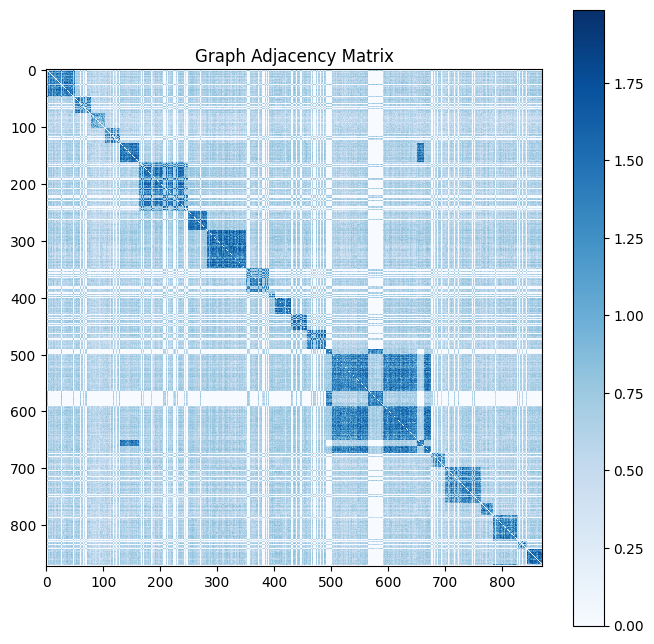

In [25]:

# Supposons que final_graph est déjà calculé dans votre code
# final_graph = create_final_graph(graph_feat, sparse_graph)

def plot_adjacency_matrix(matrix, title="Adjacency Matrix", cmap="viridis"):
    """
    Affiche une matrice d'adjacence colorée sous forme de heatmap.

    matrix    : matrice d'adjacence (matrice x matrice)
    title     : titre du graphique
    cmap      : palette de couleurs pour la heatmap
    """
    plt.figure(figsize=(8, 8))  # Taille du graphique
    plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar()  # Ajoute une barre de couleur pour l'échelle
    plt.title(title)

    # Afficher la grille
    plt.grid(False)

    # Afficher la heatmap
    plt.show()

# Affichage du graphe final comme une matrice d'adjacence
plot_adjacency_matrix(final_graph, title="Graph Adjacency Matrix", cmap="Blues")